In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
data_path = "/kaggle/input/iris-dataset/Iris.csv"

iris_df = pd.read_csv(data_path)

print("Dataset Head:")
print(iris_df.head())

Dataset Head:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_df['Species'] = iris_df['Species'].map(species_mapping)

print("Species after mapping:")
print(iris_df[['Species']].head())

Species after mapping:
   Species
0        0
1        0
2        0
3        0
4        0


In [5]:
X = iris_df.iloc[:, 1:5].values
y = iris_df['Species'].values

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (150, 4)
Target shape: (150,)


In [6]:
setosa_indices = np.where(y == 0)[0]
versicolor_indices = np.where(y == 1)[0]
virginica_indices = np.where(y == 2)[0]

setosa_train_indices = setosa_indices[:5]
virginica_train_indices = virginica_indices[:5]

setosa_test_indices = setosa_indices[5:8]
versicolor_test_indices = versicolor_indices[:2]
virginica_test_indices = virginica_indices[5:8]

train_indices = np.concatenate([setosa_train_indices, virginica_train_indices])
test_indices = np.concatenate([setosa_test_indices, versicolor_test_indices, virginica_test_indices])

X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 10
Testing set size: 8


In [7]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)[0][0]
        return most_common

In [8]:
conf_matrices = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

for k in range(1, 6):
    print(f"Evaluating KNN with k={k}")
    knn = KNNClassifier(k=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)

    conf_matrix = confusion_matrix(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
    recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
    f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)

    conf_matrices.append(conf_matrix)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

Evaluating KNN with k=1
Confusion Matrix:
[[3 0 0]
 [0 0 2]
 [0 0 3]]
Accuracy: 75.00%
Precision: 0.60
Recall: 0.75
F1 Score: 0.66

Evaluating KNN with k=2
Confusion Matrix:
[[3 0 0]
 [0 0 2]
 [0 0 3]]
Accuracy: 75.00%
Precision: 0.60
Recall: 0.75
F1 Score: 0.66

Evaluating KNN with k=3
Confusion Matrix:
[[3 0 0]
 [0 0 2]
 [0 0 3]]
Accuracy: 75.00%
Precision: 0.60
Recall: 0.75
F1 Score: 0.66

Evaluating KNN with k=4
Confusion Matrix:
[[3 0 0]
 [0 0 2]
 [0 0 3]]
Accuracy: 75.00%
Precision: 0.60
Recall: 0.75
F1 Score: 0.66

Evaluating KNN with k=5
Confusion Matrix:
[[3 0 0]
 [0 0 2]
 [0 0 3]]
Accuracy: 75.00%
Precision: 0.60
Recall: 0.75
F1 Score: 0.66



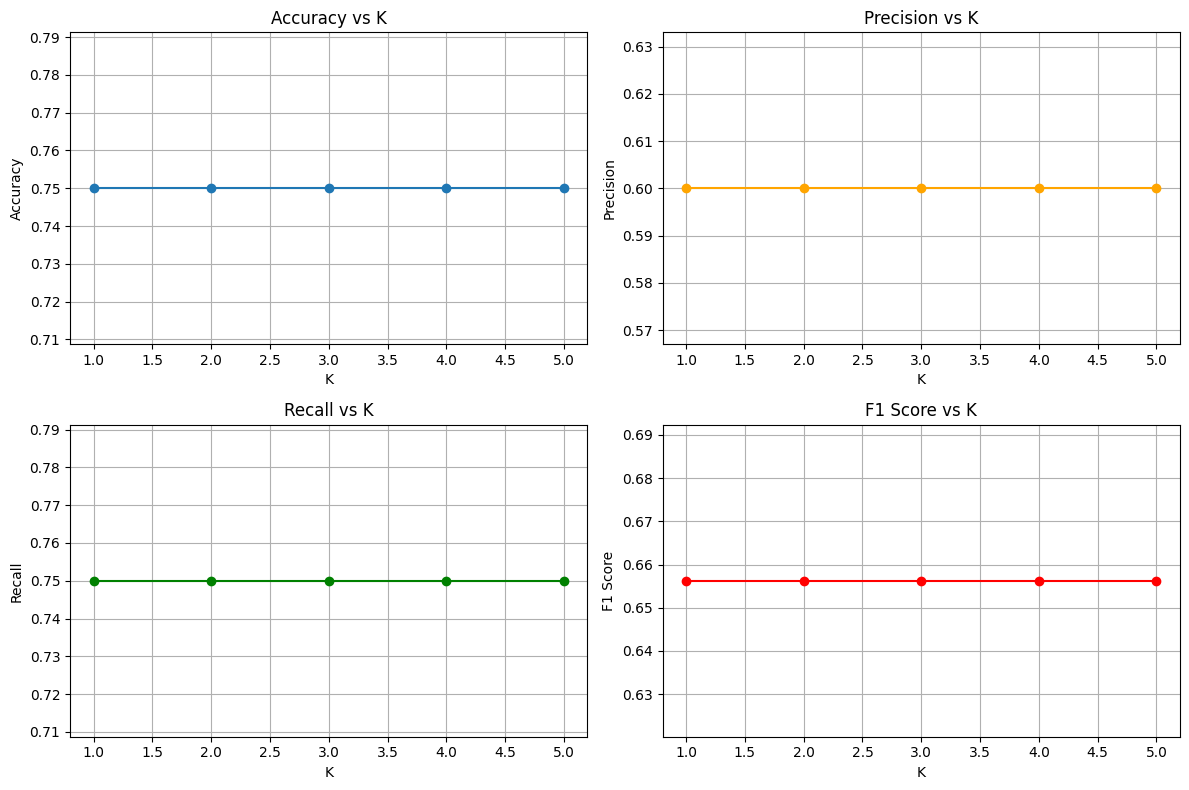

In [9]:
k_values = range(1, 6)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(k_values, accuracies, marker='o', label='Accuracy')
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(k_values, precisions, marker='o', label='Precision', color='orange')
plt.title('Precision vs K')
plt.xlabel('K')
plt.ylabel('Precision')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(k_values, recalls, marker='o', label='Recall', color='green')
plt.title('Recall vs K')
plt.xlabel('K')
plt.ylabel('Recall')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(k_values, f1_scores, marker='o', label='F1 Score', color='red')
plt.title('F1 Score vs K')
plt.xlabel('K')
plt.ylabel('F1 Score')
plt.grid(True)

plt.tight_layout()
plt.show()